### Atkenson (2020) SEIR Model
At each moment of time, the population is divided into four categories that sum to the total (of one). These are susceptible (no immunity) $S,$ exposed $E,$ infected $I,$ and recovered (or dead) $R .$ These fractions of the population evolve over time as follows
$$
\begin{array}{c}
d S / d t=-\beta_{t} \frac{S}{N} I \\
d E / d t=\beta_{t} \frac{S}{N} I-\sigma E \\
d I / d t=\sigma E-\gamma I \\
d R / d t=\gamma I \\
\beta_{t}= \lambda_{t} \gamma
\end{array}
$$

- This is a Markov model with transition probabilities between the four states. So we have that $N = S + E + I + R$.
- The first four partial differential equations describe transition dynamics between the four states. Namely, people transition from suseptible to exposed, from exposed to infected, and from infected to recovered.
- All the rates are measured in population per day (if we set N=1 then it can be interpreted as population share per day).
- $\sigma$ and $\gamma$ are disease/bilogical parameters, and hene are invariant overtime (here we are implicitly assuming no evolutionary dynamics). $\sigma$ is the reciprocal of how long one person needs to be exposed before they become infected. $\gamma$ is the reciprocal of how long one person must be infected before they are either cured or die.
- We could probably make this model simplier without losing much realism by dropping E and combining the information in $\sigma$ and $\gamma$ into a single time invariant bilogical parameter.
- $\beta_t$ is a parameter that measures how frequently individuals who are infected bump into other people and 'shed' virus onto those people. Looking at equation one, $S/N$ fraction of people they bump into are suseptible to getting the virus.
- $\beta_t$ is a reduced form parameter for policy interventions. In that sense, equations 2-4 are purely biological and cannot be directly effected by social policy measures (of course there could be medical innovations that are able to change $\sigma$ and $\gamma$ parameters).
- If we wanted a more richer model in which we could do policy experiments, we would like to microfound $\beta_t$. The network strucutre, climate, government policies etc. all go into determening $\beta_t$.
- Equation six is an identity, that defines the ratio between the meeting rate and recovery rate $\lambda_t=\frac{\beta_t}{\gamma}$. Atkenson (2020) runs experiments in his SEIR set-up by making different assumptions about $R_t$.

#### Parametization of $R_t$
$$R_{1 t}=R_{1,0} \exp \left(-\eta_{1} t\right)+\left(1-\exp \left(-\eta_{1} t\right) \bar{R}_{1}\right.$$
$$R_{2 t}=R_{2,0} \exp \left(-\eta_{2} t\right)+\left(1-\exp \left(-\eta_{2} t\right) \bar{R}_{2}\right.$$
$$R_{t}=\left(R_{1 t}+R_{2 t}\right) / 2$$

Here $R_0 = (R_{1,0} + R_{2,0})/2$ is the initial value of $R_t$ representing the spread of the disease in the inital phase. In the long run we have that,$\lim_{t\to\infty} R_t = (\bar R_1 + \bar R_2)/2$.

To get a U-shaped pattern for $R_t$, we need to make $R_{1t}$ rapidly declining function and $R_{2t}$ slowly rising function. To create the rising and falling dyanmics we have that $R_{1,0}>\bar R_1$ and $R_{2,0}<\bar R_2$. To get the appropriate paces we need $\eta_1>\eta_2$.

Therefore, the parametization of $R_t$ gives us three more equations,
$$d R_{1 t} / d t=-\eta_{1}\left(R_{1 t}-\bar{R}_{1}\right)$$
$$d R_{2 t} / d t=-\eta_{2}\left(R_{2 t}-\bar{R}_{2}\right)$$
$$d R_{t} / d t=-\frac{1}{2} \eta_{1}\left(R_{1 t}-\bar{R}_{1}\right)-\frac{1}{2} \eta_{2}\left(R_{2 t}-\bar{R}_{2}\right)$$

## My Basic SIR Model
$$
\begin{align}
    \dot S=&-\beta \frac{S}{N} I \\
    \dot I =&\beta \frac{S}{N} I-\gamma I \\
    \dot R =&\gamma I \\
    N =& S + I + R\\
\end{align}
$$
Given $S_0, I_0, R_0$ (and also $\gamma, \beta$).

For simplicity I have dropped the effected group and assumed the spreading parameter is constant. Later on I would like to relax this second assumptions to do policy interventions experiments. Additionally, the way I have set up the model, I don't have deaths since $\dot N  = 0$ (this is the same as Atkenson (2020)). Again, later on I would like to allow for this possibility and make death rate a strictly increasing convex function of $I$ to capture over-capacity issues of the medical system---alternatively, we could also use some threshold function where every severe case dies once medical fascilities are over run with patients.

From the equations above, it should be clear to see that if $I_0=0$, then any $\frac{S}{N}$ and $\frac{R}{N}$ is a steady state (in fact in this case the steady state ratio is just the initial values). But what if $I_0>0$? In my simplified model, the system is eventually in steady state if $\exists K$ such that $I_{t+k} = 0, \forall k\geq K$. Therefore in the case where $I_0>0$, the system will converge to steady state as long as,
$$\dot I < 0 \implies \beta \frac{S}{N} < \gamma $$
i.e. when each period a larger share of ill people are recovering, than the share of people being infected. Therefore for us to get explosive contagion dynamics initially we will need the opposite to be true i.e. $\beta \frac{S_0}{N_0} > \gamma$.

Lets unpack what $\beta \frac{S_0}{N_0} > \gamma$ means. Remember $\gamma$ is the reciprocal of on average how long does it take people to recover---since Corona has no cure at the moment, it is reasonable to believe this is purely biological and not in the control of governments. $\frac{S_0}{N_0}$ can be thought of as something biological too, the proportion of the population that doesn't have immunity and hence is suspetible to the virus---of course once a vaccine is developed, this is something the government could control as well. $\beta$ is a reduced form composite of biological and controlable non-biological factors. The biological aspect is how easily the virus transmits when someone is in contact with someone else (sexually transmitted diseases will have a different number than airborne ones). The non-biological aspect is how often do you get in contact with someone else who has the virus, the government can hope to control this by using quarantine style policies.

Intuitively we should expect to see exponential contagion dynamics for a virus when (i) people don't take precautions to avoid getting sick (high $\beta$), (ii) a large proportion of the population is not immune to the virus (high $\frac{S_0}{N_0}$), and (iii) it takes sometime to recover from the virus (low $\gamma$). If all these three are true, it is more likely the following condition holds $\beta \frac{S_0}{N_0} > \gamma$. 

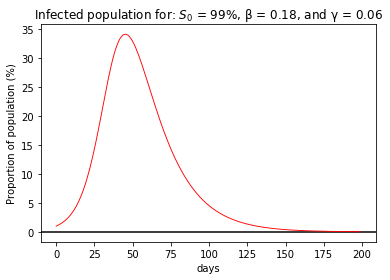

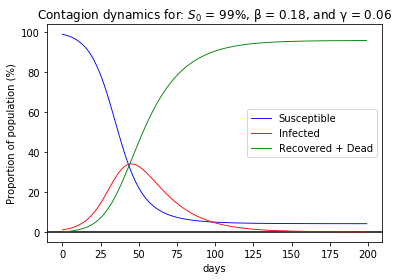

In [47]:
#Import relevent packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#define the three partial differential functions and population identity
def dS(S,N,I,β):
    return -1*β*S*I/N

def dI(S,N,I,β,γ):
    return 1*β*S*I/N - γ*I

def dR(I,γ):
    return γ*I

#define function that runs simulation
def basic_sir(S_0,I_0,R_0,γ,β,days = 1000):
    
    '''The function takes as inputs initial values, parameters and the number
    of days we want to run the simulation forward'''
    
    #initialise arrays to store simpulated values
    S = np.empty(days)
    I = np.empty(days)
    R = np.empty(days)
    N = np.empty(days)
    
    #add initial values into arrays
    S[0] = S_0
    I[0] = I_0
    R[0] = R_0
    N[0] = S_0 + I_0 + R_0
    
    for t in range(1,days):
        S[t] = S[t-1] + dS(S[t-1],N[t-1],I[t-1],β)
        I[t] = I[t-1] + dI(S[t-1],N[t-1],I[t-1],β,γ)
        R[t] = R[t-1] + dR(I[t-1],γ)
        N[t] = S[t] + I[t] + R[t]

    return S,I,R
        
#initial values and paramerts
N_0 = 100
S_0 = 0.99*N_0
I_0 = 0.01*N_0
R_0 = 0

γ = 1/18 #γ from Atkenson (2020). Since, I'm using a simplified model this probably an understimate
β = 3.25/18 #3.25 is the R_0 for Italy from Atkenson, from the atkenson set-up β_0 = R_0*gamma

days = 200 #number of days we want to run the simulation for
S,I,R = basic_sir(S_0,I_0,R_0,γ,β,days)

fig, ax = plt.subplots()
plt.axhline(0, color='black')
ax.plot(range(days),I, linestyle='-',label = 'Infected', color = 'red', linewidth=0.9)
ax.set_title('Infected population for: $S_0$ = '+ str(np.int(S_0)) +'%, β = ' + str(np.round(β,2))+ ', and γ = '+ str(np.round(γ,2)))
ax.set_xlabel('days')
ax.set_ylabel('Proportion of population (%)')
plt.show()

fig, ax = plt.subplots()
plt.axhline(0, color='black')
ax.plot(range(days),S, linestyle='-',label = 'Susceptible',color = 'blue',linewidth=0.9)
ax.plot(range(days),I, linestyle='-',label = 'Infected', color = 'red', linewidth=0.9)
ax.plot(range(days),R, linestyle='-',label = 'Recovered + Dead',color = 'green',linewidth=0.9)
ax.set_title('Contagion dynamics for: $S_0$ = '+ str(np.int(S_0)) +'%, β = ' + str(np.round(β,2))+ ', and γ = '+ str(np.round(γ,2)))
ax.set_xlabel('days')
ax.set_ylabel('Proportion of population (%)')
ax.legend(loc="center right",ncol=1)
plt.show()
    